### Summary:


> Feature encoding:
1. One-hot Encoding for Linear Regression(Ridge, Lasso)
2. Label Encoding for Tree-based models

> Feature importance:
1. From Ridge:
[('city_LOOMIS', 255657.16792003103),
 ('city_GRANITE BAY', 210224.70962255102),
 ('city_ELVERTA', -110298.27553560599),
 ('city_WALNUT GROVE', 96940.214942627936),
 ('city_NORTH HIGHLANDS', -92807.269564508562),
 ('city_MATHER', -87483.255104362732),
 ('city_RANCHO CORDOVA', -81528.73995627249),
 ('city_ANTELOPE', -78009.172443906806),
 ('city_WILTON', 68602.81506144478),
 ('city_GREENWOOD', -62531.550622174662),
 ('city_CITRUS HEIGHTS', -60028.118421290594),
 ('city_GOLD RIVER', 59755.488911198525),
 ('latitude', 57077.361004522354),
 ('city_RIO LINDA', -53897.255200979191),
 ('city_ELK GROVE', -52117.656747969282),
 ('city_FOLSOM', 50694.307059907107),
 ('street_t_others', 44244.752058880607),
 ('city_GALT', -43229.903867043453),
 ('city_AUBURN', 40767.528626936444),
 ('street_t_BLVD', -38398.899285840576)]
2. From Random Forest:
[('sq__ft', 0.69539403814452294),
 ('longitude', 0.136424775841784),
 ('latitude', 0.075937152395958094),
 ('sale_date', 0.022736348352620683),
 ('street_t', 0.022111636592509337),
 ('city', 0.015946392323020597),
 ('beds', 0.014743702564788432),
 ('baths', 0.013509928730061944),
 ('city_bi', 0.0021669701238583895),
 ('type', 0.0010290549308750799)]

From the feature importance in Random Forest, the size(sq__ft), location(longitude, latitude) are the most important features. From Ridge, the top 20 important features mainly include the cities which represent the influence of location on price

#### Performance (Mean Squared Error)

Model | Cross Validation MSE | Test MSE
----- | ---------------------| --------
Baseline | 14311627419.02095 
Ridge | 5357328970.21 | 5837489353.82
Decision Tree | 6507204205.87 | 7907573268.44
Random Forest | 5532697156.03 | 6610555583.08


#### Analysis

* all models perform much better than baseline.
* all models have some overfitting problem but tree models are much worse because they have poorer performance on test set than cross validation.
* Ridge gives the best both of validation and test performance

#### Suggestion:

I would suggest Ridge as the final model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import  train_test_split, cross_val_score, validation_curve, ParameterGrid
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error


In [2]:
data_new = pd.read_csv('data_new.csv')

In [3]:
data_new.head()

,city,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,city_bi,street_t
0,SACRAMENTO,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,SACRAMENTO,ST
1,SACRAMENTO,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,SACRAMENTO,CT
2,SACRAMENTO,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,SACRAMENTO,ST
3,SACRAMENTO,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,SACRAMENTO,WAY
4,SACRAMENTO,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,SACRAMENTO,DR


In [4]:
# Label Encoding and One-hot Encoding
X = data_new.drop('price', axis=1)
y = data_new.price

# Label encoding
labelencoder_X = LabelEncoder()
X_label = X.apply(labelencoder_X.fit_transform).values

# One Hot encoding
X_one_df = pd.get_dummies(X, columns=['city', 'type', 'sale_date','city_bi', 'street_t'])
X_one = X_one_df.as_matrix()

In [5]:
# Baseline
print 'Baseline:', ((y - y.mean())**2).sum()/len(y)

Baseline: 14311627419.0


### Linear Regression

In [6]:
def plot_val_curve(model, X, y, param, values):
    '''
    Plotting validation curve of the model to diagnose bias-variance tradeoff for different parameters
    '''
    # Validation curve scores
    train_scores, valid_scores = validation_curve(model, X, y, param, values,cv=6, scoring='neg_mean_squared_error')
    best_mse = (-valid_scores.mean(axis=1)).min()
    
    # Plotting
    plt.plot(values, -train_scores.mean(axis=1), label='training MSE')
    plt.plot(values, -valid_scores.mean(axis=1), color='r', label='validation MSE')
    plt.title('Validation Curve')
    plt.legend()
    plt.show()
    
    print 'Best performance: ', best_mse
    

In [7]:
# Using OneHotEncoding data
X_train, X_test, y_train, y_test = train_test_split(X_one, y, test_size = 0.2, random_state = 48)

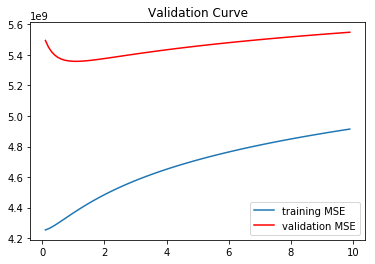

Best performance:  5357328970.21


In [8]:
rg = Ridge()
param = 'alpha'
values = np.arange(0.1, 10, 0.1)
plot_val_curve(rg, X_train, y_train, param, values)

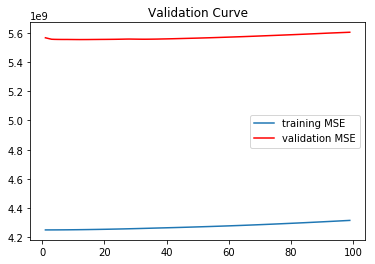

Best performance:  5553161137.75


In [11]:
ls = Lasso()
param = 'alpha'
values = np.arange(1, 100.0, 1)
plot_val_curve(ls, X_train, y_train, param, values)

In [22]:
# Final test
rg = Ridge(alpha=0.3)
rg.fit(X_train, y_train)
pred = rg.predict(X_test)
test_mse = mean_squared_error(y_test, pred)
print 'Test MSE: ', test_mse

Test MSE:  5837489353.82


In [23]:
# Top 20 important features
sorted(zip(list(X_one_df.columns), rg.coef_), key=lambda tup: abs(tup[1]), reverse=True)[:20]

[('city_LOOMIS', 255657.16792003103),
 ('city_GRANITE BAY', 210224.70962255102),
 ('city_ELVERTA', -110298.27553560599),
 ('city_WALNUT GROVE', 96940.214942627936),
 ('city_NORTH HIGHLANDS', -92807.269564508562),
 ('city_MATHER', -87483.255104362732),
 ('city_RANCHO CORDOVA', -81528.73995627249),
 ('city_ANTELOPE', -78009.172443906806),
 ('city_WILTON', 68602.81506144478),
 ('city_GREENWOOD', -62531.550622174662),
 ('city_CITRUS HEIGHTS', -60028.118421290594),
 ('city_GOLD RIVER', 59755.488911198525),
 ('latitude', 57077.361004522354),
 ('city_RIO LINDA', -53897.255200979191),
 ('city_ELK GROVE', -52117.656747969282),
 ('city_FOLSOM', 50694.307059907107),
 ('street_t_others', 44244.752058880607),
 ('city_GALT', -43229.903867043453),
 ('city_AUBURN', 40767.528626936444),
 ('street_t_BLVD', -38398.899285840576)]

### Decision Tree

In [18]:
# Set parameter grid
parametrs = {'max_depth': [ 6, 9],
             'min_samples_split': [2],
             'min_samples_leaf': [10],
             'random_state': [42]
            }
param_grid = ParameterGrid(parametrs)

In [19]:
# Using LabelEncoding features
X_train, X_test, y_train, y_test = train_test_split(X_one, y, test_size = 0.2, random_state = 48) 

# Parameter tuning and give best param and score
best_score = 10000000000
best_param = None
for param in param_grid:
    dc = DecisionTreeRegressor(**param)
    
    vali_score = cross_val_score(dc, X_train, y_train, scoring='neg_mean_squared_error', cv=6)
    
    if -vali_score.mean() < best_score:
        best_score = -vali_score.mean()
        best_param = param
        
print 'Best param: ', best_param
print 'Best MSE: ', best_score

Best param:  {'min_samples_split': 2, 'random_state': 42, 'max_depth': 9, 'min_samples_leaf': 10}
Best MSE:  6507204205.87


In [20]:
# Fit the training data and get test MSE 
dc = DecisionTreeRegressor(**best_param)
dc.fit(X_train, y_train)
pred = dc.predict(X_test)
test_mse = mean_squared_error(y_test, pred)
print 'Test MSE: ', test_mse

Test MSE:  7907573268.44


### Random Forest

In [77]:
# Parameter grid
parametrs = {'max_depth': [ 5, 10, 20],
             'min_samples_split': [2, 4],
             'min_samples_leaf': [4, 6],
             'random_state': [42],
              'n_estimators': [100],
             'n_jobs': [-1]
            }
param_grid = ParameterGrid(parametrs)

In [87]:
# Using LabelEncoding features
X_train, X_test, y_train, y_test = train_test_split(X_label, y, test_size = 0.2, random_state = 48) 

In [88]:

# Parameter tuning and give best param and score
best_score = 10000000000
best_param = None
for param in param_grid:
    rf = RandomForestRegressor(**param)
    
    vali_score = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=6)
    
    if -vali_score.mean() < best_score:
        best_score = -vali_score.mean()
        best_param = param
        
print 'Best param: ', best_param
print 'Best MSE: ', best_score   

Best param:  {'n_jobs': -1, 'min_samples_leaf': 4, 'n_estimators': 100, 'random_state': 42, 'min_samples_split': 2, 'max_depth': 10}
Best MSE:  5532697156.03


In [89]:
# Increase the number of trees and Fit the training data and get test MSE 
best_param = {'n_jobs': -1, 'min_samples_leaf': 4, 'n_estimators': 500, 'random_state': 42, 'min_samples_split': 2, 'max_depth': 20}
rf = RandomForestRegressor(**best_param)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
test_mse = mean_squared_error(y_test, pred)
print 'Test MSE: ', test_mse

Test MSE:  6610555583.08


In [90]:
# The feature importance
sorted(zip(X, rf.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)

[('sq__ft', 0.69539403814452294),
 ('longitude', 0.136424775841784),
 ('latitude', 0.075937152395958094),
 ('sale_date', 0.022736348352620683),
 ('street_t', 0.022111636592509337),
 ('city', 0.015946392323020597),
 ('beds', 0.014743702564788432),
 ('baths', 0.013509928730061944),
 ('city_bi', 0.0021669701238583895),
 ('type', 0.0010290549308750799)]